In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pickle
import itertools

np.random.seed(123)

Using TensorFlow backend.


In [2]:
# Saving the train images/labels
save_path = "pickle_files/"

# with open(os.path.join(save_path, "train.pkl"), "wb") as f:
#     pickle.dump((train_images, train_labels), f)

In [3]:
# Saving the val images/labels

# with open(os.path.join(save_path, "val.pkl"), "wb") as f:
#     pickle.dump((val_images, val_labels), f)

In [3]:
# Load train images/labels
with open(os.path.join(save_path, "train.pkl"), "rb") as f:
    (train_images, train_labels) = pickle.load(f)

In [4]:
# Load val images/labels
with open(os.path.join(save_path, "val.pkl"), "rb") as f:
    (val_images, val_labels) = pickle.load(f)

In [6]:
LB = LabelBinarizer()
train_labels = LB.fit_transform(train_labels)
val_labels = LB.fit_transform(val_labels)

In [7]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
classes_dict = {'#': 0,
 '$': 1,
 '&': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 '@': 13,
 'A': 14,
 'B': 15,
 'C': 16,
 'D': 17,
 'E': 18,
 'F': 19,
 'G': 20,
 'H': 21,
 'I': 22,
 'J': 23,
 'K': 24,
 'L': 25,
 'M': 26,
 'N': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38}

In [8]:
# Load model

model_3 = keras.models.load_model('saved_models/CNN_model_3')

In [15]:
def sort_contours(cnts, method='left-to-right'):
    reverse = False
    i = 0
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
    if method == 'top-to-bottom' or method == 'botton-to-top':
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
       key = lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [19]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model_3.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        ypred = [k for k, v in classes_dict.items() if v == ypred]
        [x] = ypred
        letters.append(x)
    return letters, image

In [17]:
def get_word(letter):
    word = "".join(letter)
    return word

CLARA


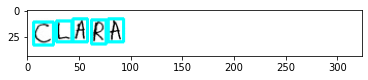

In [20]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00411.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

JENNIFER


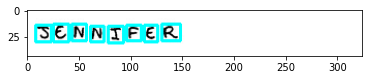

In [43]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_20375.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

MICHHEL


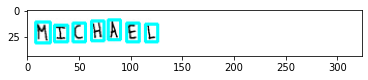

In [50]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_64874.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

E175A


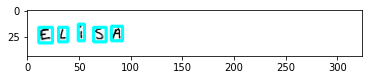

In [52]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00037.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

6E0R6E


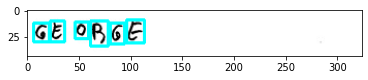

In [56]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_27599.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

TH0MA5


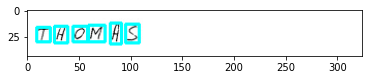

In [58]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00027.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)